# Featurization, Model Selection and Tuning | Project 1 | Predict House Prices

Dataset Info: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.19 house features plus the price and the id columns, along with 21613 observations.

## #1 Import libraries and read the dataset

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import os

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Library for Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Import Library for Identification of Featurization, Model Selection and Model Tuning
from sklearn import model_selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Set Options for Tabular Output
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

# Import Libraries for Train-Test split, Scaling,Label encoder and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Other Libraries
from pandas import set_option
from pandas.plotting import scatter_matrix

In [2]:
# Import Dataset
house = pd.read_csv("kc_house_data.csv")
house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0  3         1.00       1180          
1  6414100192  20141209T000000  538000.0  3         2.25       2570          
2  5631500400  20150225T000000  180000.0  2         1.00       770           
3  2487200875  20141209T000000  604000.0  4         3.00       1960          
4  1954400510  20150218T000000  510000.0  3         2.00       1680          

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0  5650      1.0     0           0     3          7      1180         
1  7242      2.0     0           0     3          7      2170         
2  10000     1.0     0           0     3          6      770          
3  5000      1.0     0           0     5          7      1050         
4  8080      1.0     0           0     3          8      1680         

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0  0              1955      0             98178    47.5112 -122.257   
1  400            1951      1991          98125    47.7210 -122.319   
2  0              1933      0             98028    47.7379 -122.233   
3  910            1965      0             98136    47.5208 -122.393   
4  0              1987      0             98074    47.6168 -122.045   

   sqft_living15  sqft_lot15  
0  1340           5650        
1  1690           7639        
2  2720           8062        
3  1360           5000        
4  1800           7503

## Data Preprocessing

In [3]:
# 1 Cleaning any leading/trailing whitespace in the column header
house.columns = [x.strip() for x in house.columns]
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

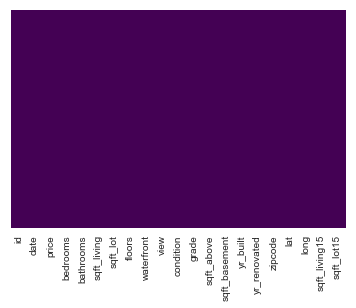

In [4]:
# 2 Missing Value Treatment

# 2.1 Identification of missing values through data visualization
sns.heatmap(house.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Insight: No missing value in the given dataset

In [5]:
# 3 Read the column description and ensure you understand each attribute well
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
# 3.1 Modify variables into their correct datatypes
house['date'] = pd.to_datetime(house['date'])
house['zipcode'] = house['zipcode'].astype(object)
house['yr_built'] = house['yr_built'].astype(object)
house['yr_renovated'] = house['yr_renovated'].astype(object)
house['lat'] = house['lat'].astype(object)
house['long'] = house['long'].astype(object)

In [7]:
# 4 Now understanding the numeric attributes through describe function
round(house.describe().transpose(),2)

count          mean           std        min           25%  \
id             21613.0  4.580302e+09  2.876566e+09  1000102.0  2.123049e+09   
price          21613.0  5.400881e+05  3.671272e+05  75000.0    3.219500e+05   
bedrooms       21613.0  3.370000e+00  9.300000e-01  0.0        3.000000e+00   
bathrooms      21613.0  2.110000e+00  7.700000e-01  0.0        1.750000e+00   
sqft_living    21613.0  2.079900e+03  9.184400e+02  290.0      1.427000e+03   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  520.0      5.040000e+03   
floors         21613.0  1.490000e+00  5.400000e-01  1.0        1.000000e+00   
waterfront     21613.0  1.000000e-02  9.000000e-02  0.0        0.000000e+00   
view           21613.0  2.300000e-01  7.700000e-01  0.0        0.000000e+00   
condition      21613.0  3.410000e+00  6.500000e-01  1.0        3.000000e+00   
grade          21613.0  7.660000e+00  1.180000e+00  1.0        7.000000e+00   
sqft_above     21613.0  1.788390e+03  8.280900e+02  290.0      1.190000e+03   
sqft_basement  21613.0  2.915100e+02  4.425800e+02  0.0        0.000000e+00   
sqft_living15  21613.0  1.986550e+03  6.853900e+02  399.0      1.490000e+03   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  651.0      5.100000e+03   

                        50%           75%           max  
id             3.904930e+09  7.308900e+09  9.900000e+09  
price          4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  5.600000e+02  4.820000e+03  
sqft_living15  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     7.620000e+03  1.008300e+04  8.712000e+05

Insight: House with bedroom and bathroom = 0, looks likely to have logical error while data entry, hence require imputation

In [8]:
# 4.1 Imputing bedroom = 0 with Median
house['bedrooms'] = house['bedrooms'].replace(0,np.nan)
house['bedrooms'] = house['bedrooms'].fillna(house['bedrooms'].mean()).astype(int)

In [9]:
# 4.2 Imputing bathroom = 0 with Median
house['bathrooms'] = house['bathrooms'].replace(0,np.nan)
house['bathrooms'] = house['bathrooms'].fillna(house['bathrooms'].median()).astype(float)

In [10]:
house.describe().transpose()

count          mean           std        min           25%  \
id             21613.0  4.580302e+09  2.876566e+09  1000102.0  2.123049e+09   
price          21613.0  5.400881e+05  3.671272e+05  75000.0    3.219500e+05   
bedrooms       21613.0  3.372646e+00  9.264231e-01  1.0        3.000000e+00   
bathrooms      21613.0  2.115798e+00  7.688234e-01  0.5        1.750000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  290.0      1.427000e+03   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  520.0      5.040000e+03   
floors         21613.0  1.494309e+00  5.399889e-01  1.0        1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.0        0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.0        0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.0        3.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.0        7.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  290.0      1.190000e+03   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.0        0.000000e+00   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  399.0      1.490000e+03   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  651.0      5.100000e+03   

                        50%           75%           max  
id             3.904930e+09  7.308900e+09  9.900000e+09  
price          4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  5.600000e+02  4.820000e+03  
sqft_living15  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     7.620000e+03  1.008300e+04  8.712000e+05

In [11]:
# ID and Date is not required for future analysis hence dropping ID and Date
house.drop(['id','date'],axis = 1, inplace = True)

## Outlier Identification and Imputation

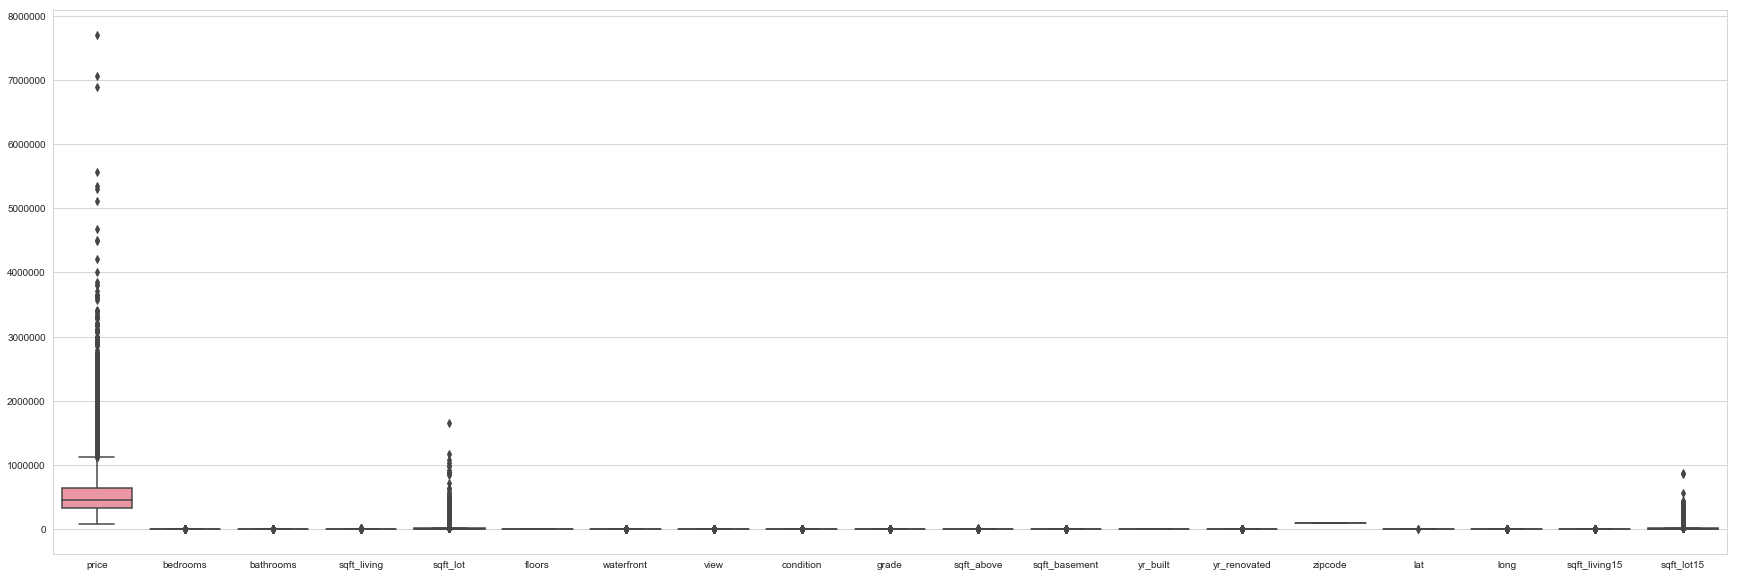

In [12]:
# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = house)

Insight: We can see that outliers are present in attributes such as price, sqft_lot and sqft_lot15. To fix the issue we'll impute it by Max/ Min of price, sqft_lot and sqft_lot15.

In [13]:
# Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 price            323050.00
bedrooms         1.00     
bathrooms        0.75     
sqft_living      1123.00  
sqft_lot         5648.00  
floors           1.00     
waterfront       0.00     
view             0.00     
condition        1.00     
grade            1.00     
sqft_above       1020.00  
sqft_basement    560.00   
sqft_living15    870.00   
sqft_lot15       4983.00  
dtype: float64


In [14]:
# Imputing the Upper bound Outliers with Max Value - price, sqft_lot, sqft_lot15
house.loc[house.price > u_bound.price, 'price'] = u_bound.price
house.loc[house.sqft_lot > u_bound.sqft_lot, 'sqft_lot'] = u_bound.sqft_lot
house.loc[house.sqft_lot15 > u_bound.sqft_lot15, 'sqft_lot15'] = u_bound.sqft_lot15

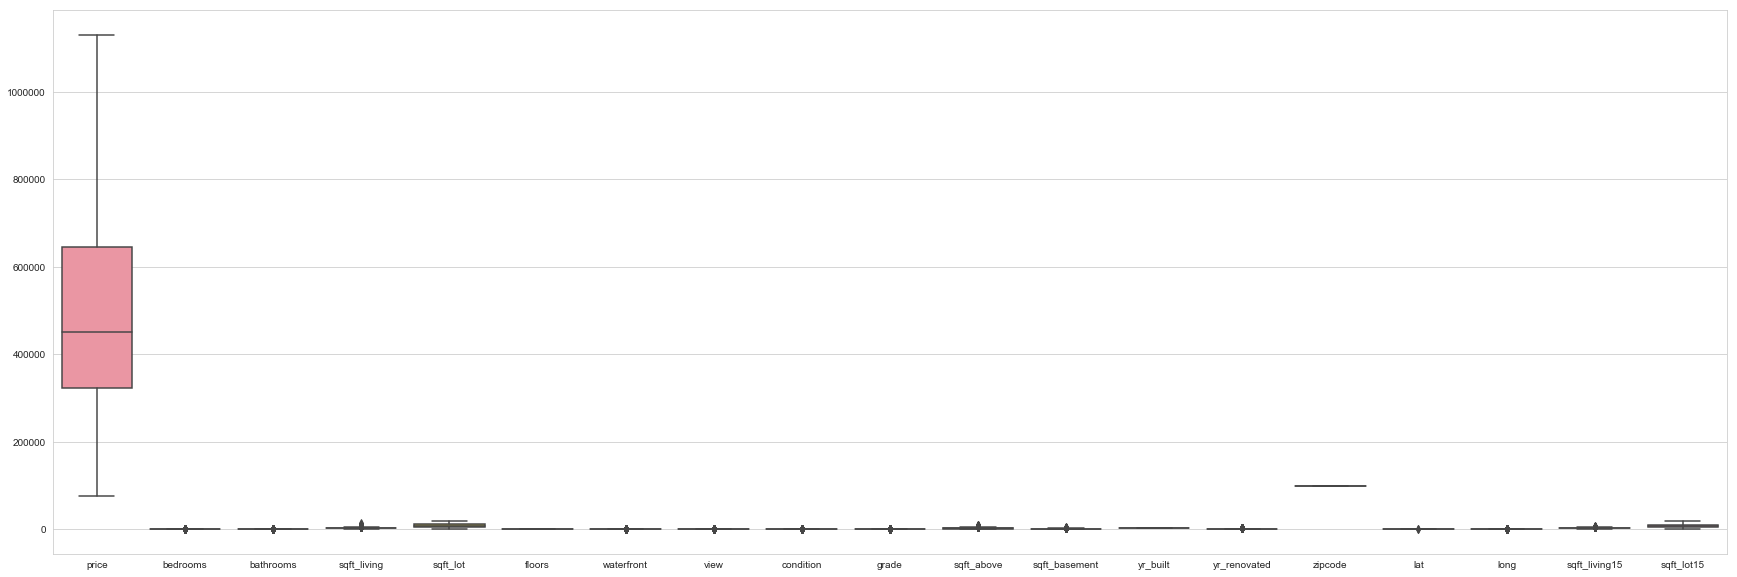

In [15]:
# BOXPLOT to see if their are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = house)

Insight: Outliers imputed by Max value for price, sqft_lot and sqft_lot15

## #2 & 3. Explore Data Analysis. Find out how one variable related to other and distributions of data. State your insights.

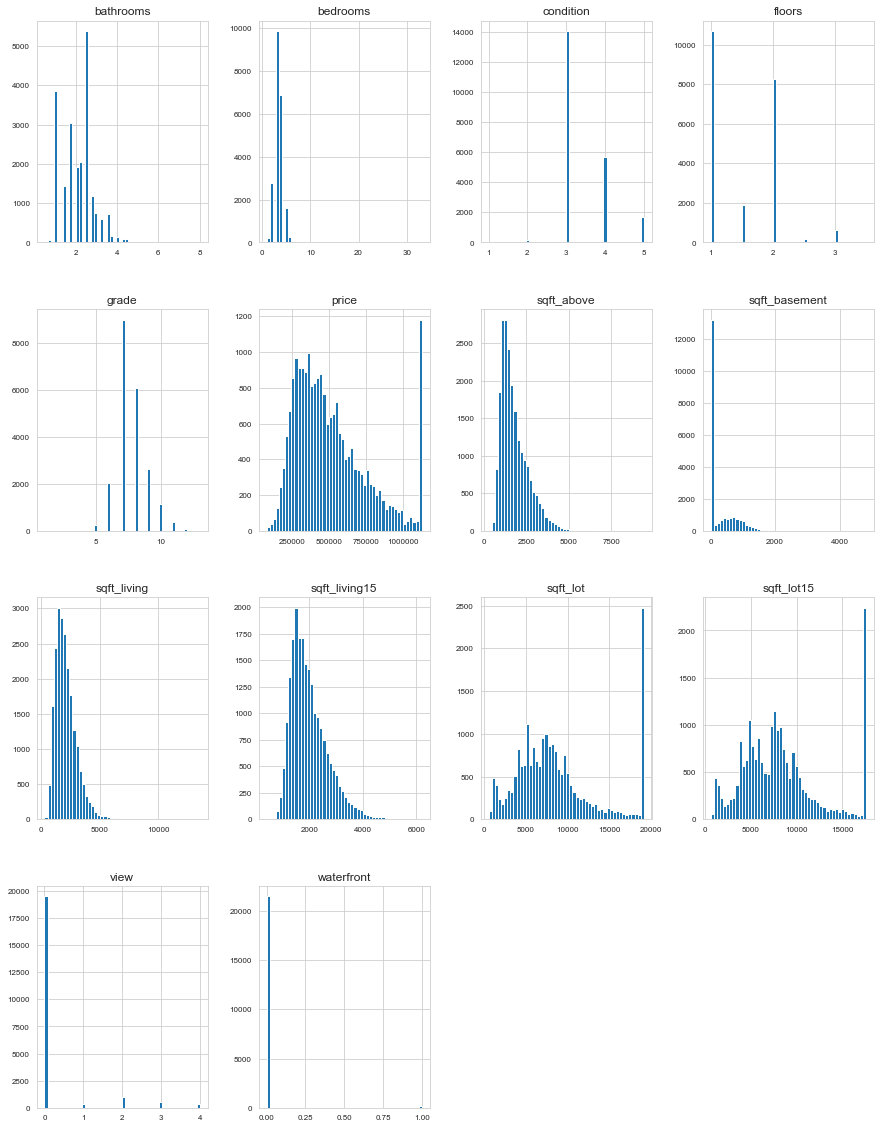

In [16]:
# 2.1 # Plot the distribution for each variable
house.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

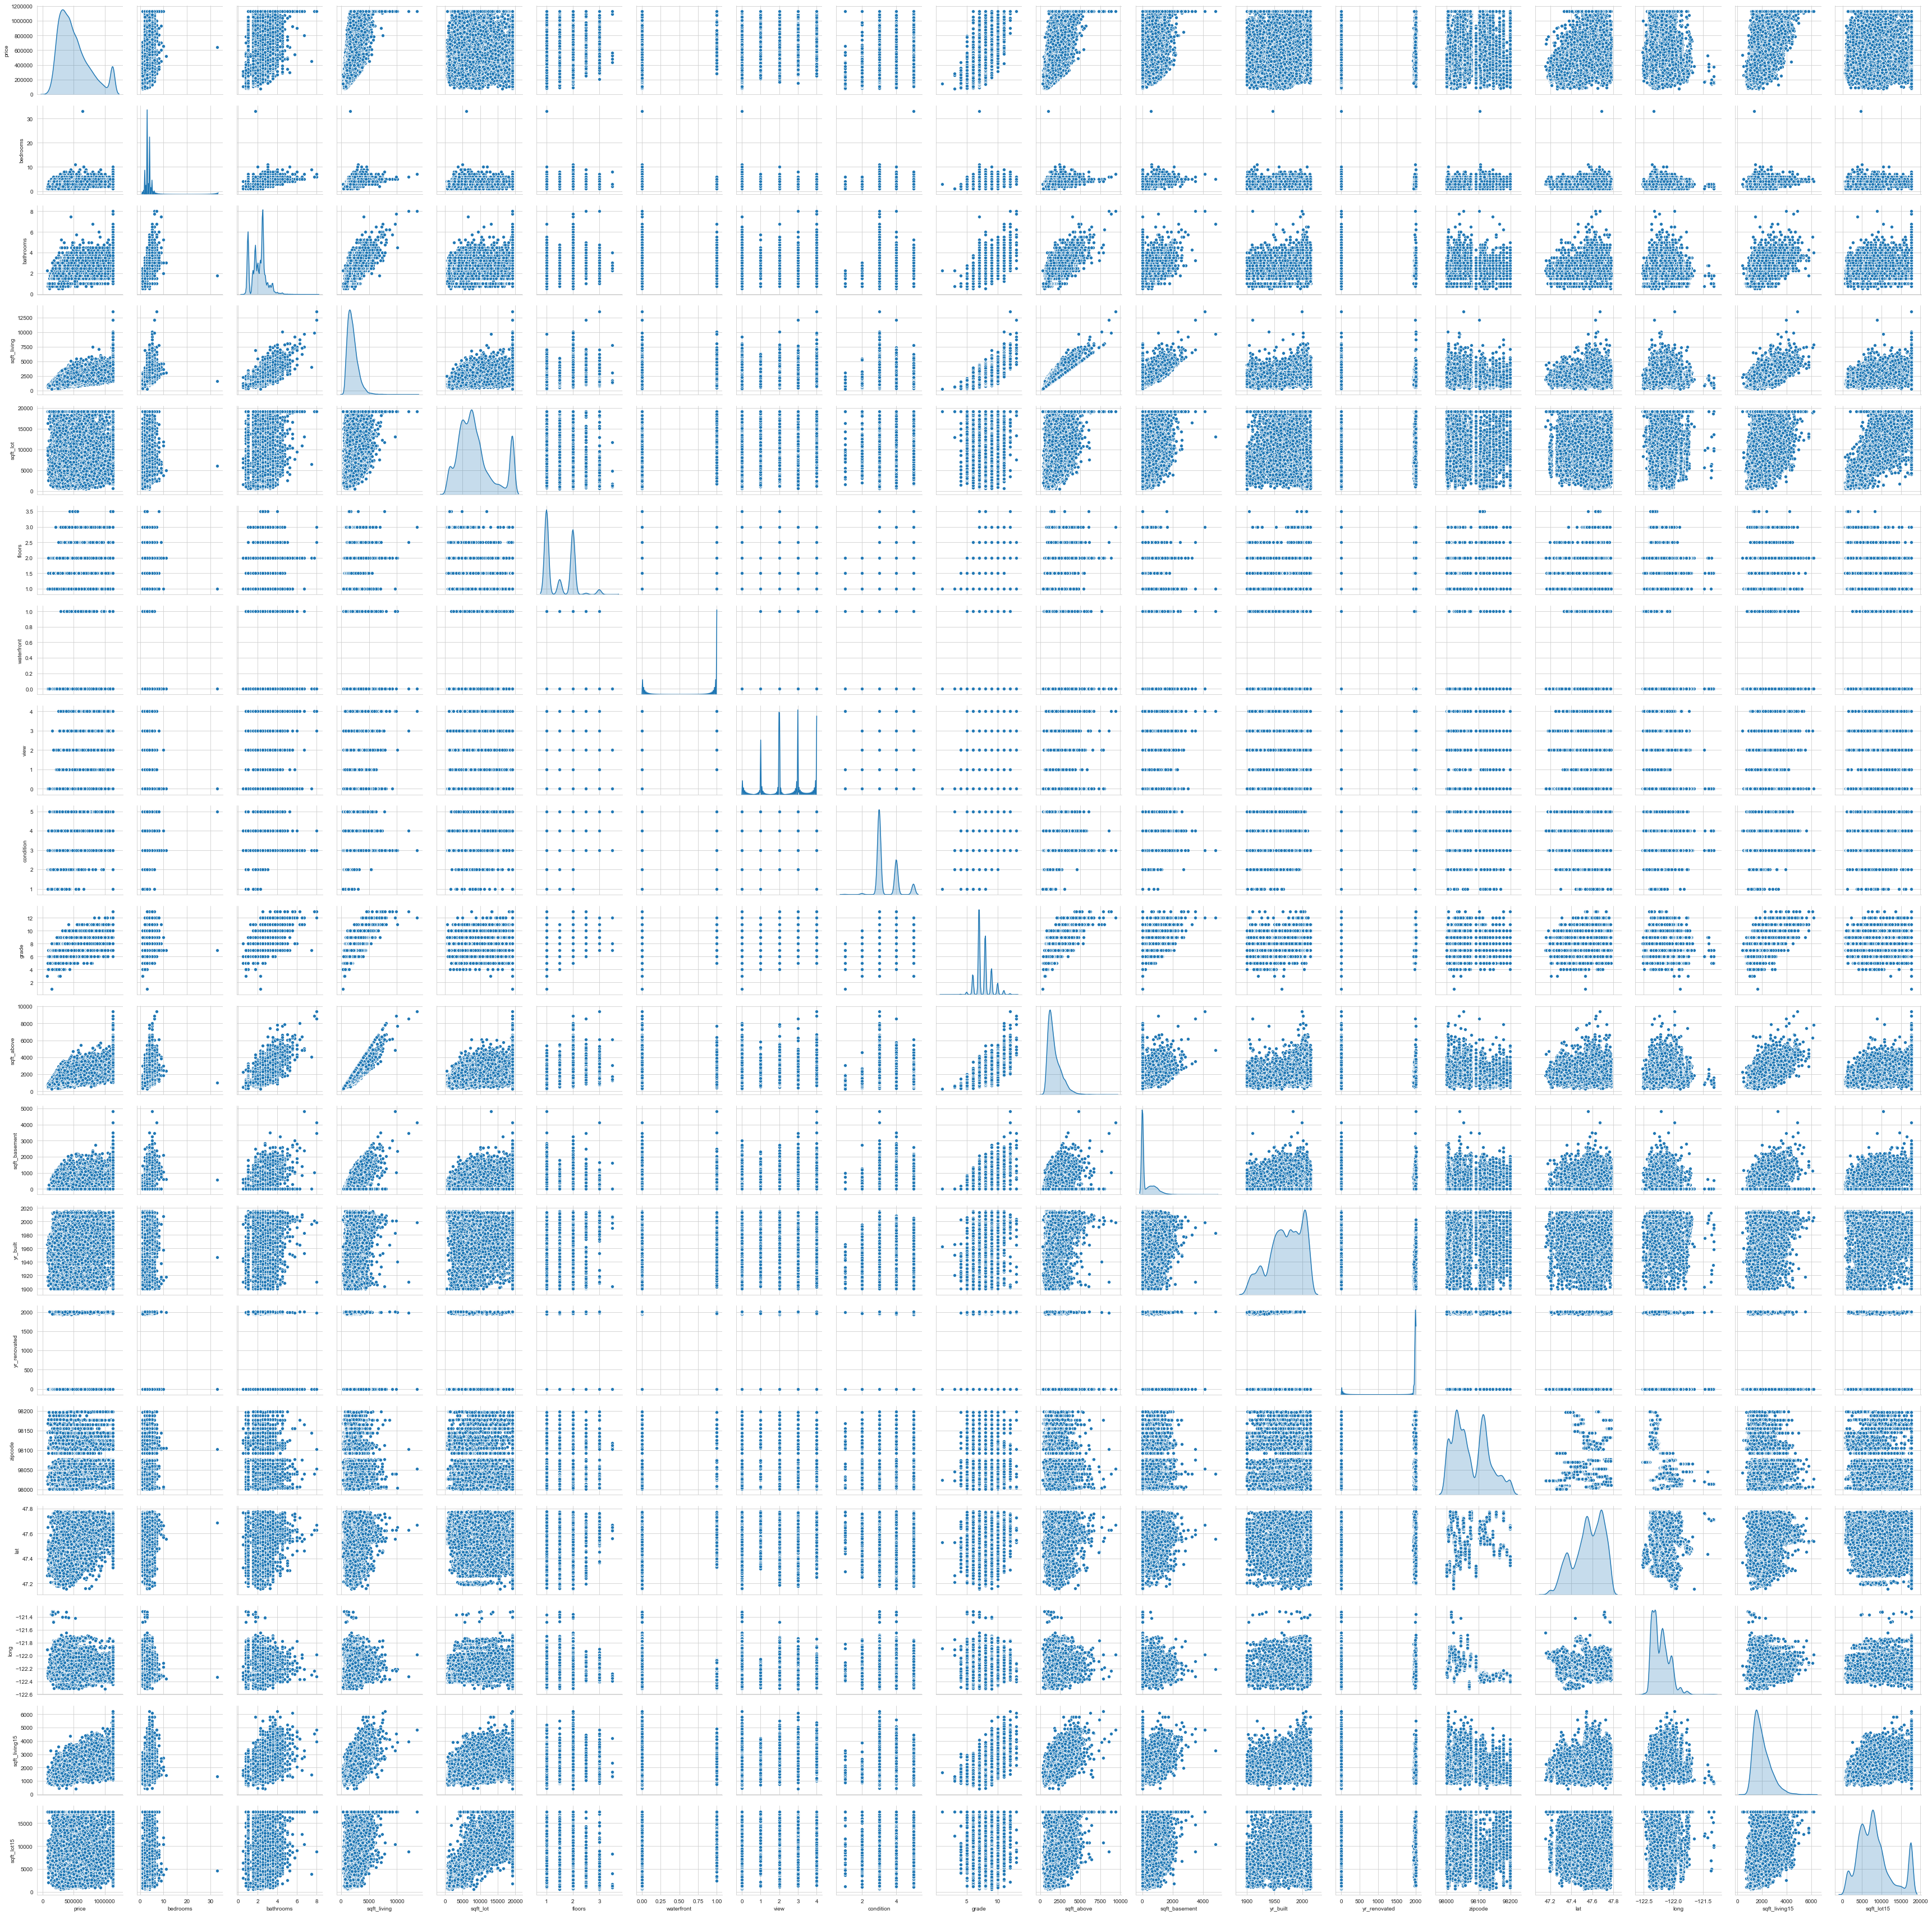

In [17]:
# 2.2 Bi - Variate Analysis 1: Pairplot
sns.pairplot(house,diag_kind='kde')

In [18]:
# Converting to int for correlation plot
house['zipcode'] = house['zipcode'].astype(int)
house['yr_built'] = house['yr_built'].astype(int)
house['yr_renovated'] = house['yr_renovated'].astype(int)
house['lat'] = house['lat'].astype(float)
house['long'] = house['long'].astype(float)

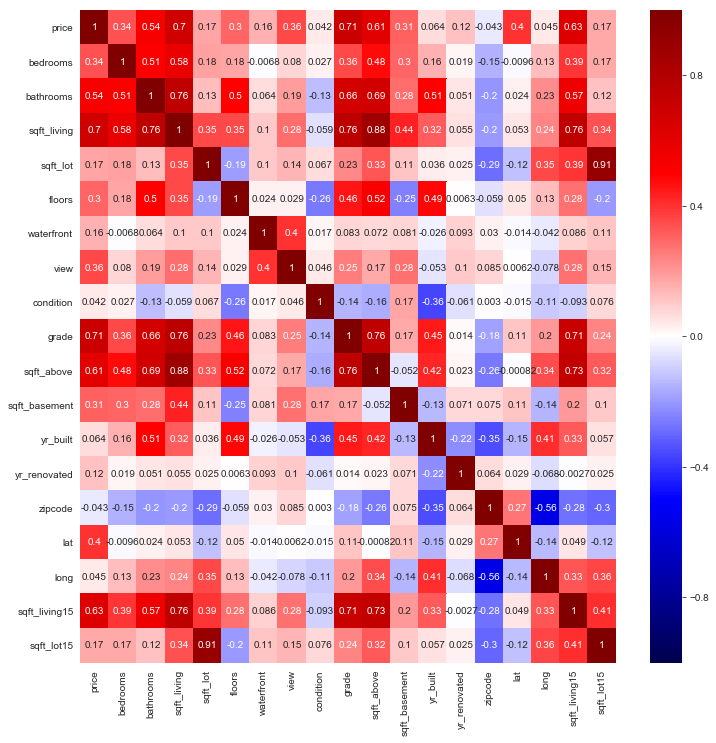

In [19]:
# 2.3 Bi - Variate Analysis 2: Check for correlation between attributes

fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(house.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

Insights: 
1. Through pairplot we can see that multiple gaussians overlapping (or multi mode available) in attributes suggesting possibility if clusters within dataset.
2. Through correlation matrix we can see that, our target variable price does have moderate correlation with bathrooms, sqft_living, grade, sqft_above and sqft_living15. and weak correlation with bedrooms, sqft_lot, waterfront, view, condition, sqft_lot15
3. High internal correlation available among the attributes

In [20]:
# Since yr_built, yr_renovated, zipcode, long and condition is very less correlated with price - dropping this feature from study
house.drop(['condition','yr_built','yr_renovated','zipcode','long'], axis = 1, inplace = True)

## #4. Build a linear regression model to predict the house prices

In [21]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
# Dependent Variable
Y = house['price']

# Independent Variable
X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'sqft_lot15']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (21613,) 

Shape of Independent Variable:
 (21613, 13)


In [23]:
# Dividing the dataset into train and test sets (80:20 - Train:Test Ratio )
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (17290, 13)
Shape of X Test:	 (4323, 13)
Shape of Y Train:	 (17290,)
Shape of Y Test:	 (4323,)


In [24]:
# Multiple Linear Regression
lm = LinearRegression()

# Model building on training dataset
lm.fit(X_train,Y_train)

# Prediction
prediction = lm.predict(X_test)

In [25]:
# Intercept and Coefficient

print("Intercept:",round(lm.intercept_,3),"\n")
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['Coefficient']
print("Coefficients:")
round(coefficients,3)

Intercept: -28941614.04 

Coefficients:


Coefficient
bedrooms      -1523.532   
bathrooms     -6579.001   
sqft_living    61.689     
sqft_lot      -0.538      
floors        -11730.280  
waterfront     135018.251 
view           41324.259  
grade          67888.713  
sqft_above     26.732     
sqft_basement  34.957     
lat            603438.039 
sqft_living15  52.478     
sqft_lot15    -3.158

In [26]:
# Model Evaluation - Key Metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, prediction),3))
print('MSE:', round(metrics.mean_squared_error(Y_test, prediction),3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, prediction)),3))
print('R2 Squared:', round(metrics.r2_score(Y_test,prediction),3))

MAE: 102632.616
MSE: 18627169564.78
RMSE: 136481.389
R2 Squared: 0.71


Insight: Without featurization, model selection and tuning we're able to achieve an accuracy of 71%

## #5&6. Try to find out important features or create new features to improve the performance for your model. Use appropriate cross validations techniques to find out the best predictor parameters and best prediction

### Feature Selection

In [27]:
# Build step forward feature selection with k folds - 5
sfs1 = sfs(lm, k_features=5, forward=False, scoring='r2', cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train.values, Y_train.values)

# Metric dict
sfs1.get_metric_dict()

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.69165823, 0.71135388, 0.7060855 , 0.70392682, 0.69785352]),
  'avg_score': 0.7021755874926907,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.008753016925153893,
  'std_dev': 0.006810144536523257,
  'std_err': 0.0034050722682616285},
 12: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.6916051 , 0.71149209, 0.70605367, 0.70421296, 0.69779914]),
  'avg_score': 0.7022325931589739,
  'feature_names': ('0',
   '1',
   '2',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12'),
  'ci_bound': 0.008846309095753782,
  'std_dev': 0.006882729014691629,
  'std_err': 0.0034413645073458144},
 11: {'feature_idx': (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.69156121, 0.71164221, 0.70620392, 0.7041691 , 0.69782745]),
  'avg_score': 0.7022807778590556,

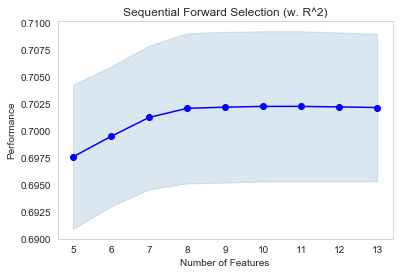

In [28]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [29]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 6, 7, 10, 11]


In [30]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['sqft_living', 'view', 'grade', 'lat', 'sqft_living15']


### Build full model with selected features

In [31]:
# Multiple Linear Regression
linR = LinearRegression()

# Model building on training dataset
linR.fit(X_train[subsetColumnList], Y_train)

# Prediction on training data
y_train_pred = linR.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(X_train[subsetColumnList], Y_train))

# Prediction on testing data
y_test_pred = linR.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(X_test[subsetColumnList], Y_test))

Training accuracy on selected features: 0.698
Testing accuracy on selected features: 0.709


In [32]:
# Intercept and Coefficient

print("Intercept:",round(linR.intercept_,3),"\n")
coefficients = pd.DataFrame(linR.coef_,X[subsetColumnList].columns)
coefficients.columns = ['Coefficient']
print("Coefficients:")
round(coefficients,3)

Intercept: -29846471.418 

Coefficients:


Coefficient
sqft_living    83.598     
view           49027.605  
grade          65644.602  
lat            622058.963 
sqft_living15  42.757

## Extra Section: Model Selection and Tuning

### Model Selection on Non - Scaled Data

In [37]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [38]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [39]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

LR: 18466415106.353382 (529797188.753691)
KNN: 28424108952.360023 (822082020.158741)
CART: 17400993528.553268 (913310715.738846)


It looks like CART has the lowest MSE, followed closely by LR

### Model Selection on Scaled Data


In [40]:
# Evaluate Algorithms: Standardization

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 18464594757.550301 (529106359.102277)
ScaledKNN: 12252785250.282034 (379052900.984288)
ScaledCART: 17356961217.289894 (1001268769.267110)


We can see that scaling did have an effect on KNN, driving the error lower than the other models.

We can see that KNN has both a tight distribution of error and has the lowest score.